# Nuclide examples
In this interactive notebook, we walk through how to use the `nuclide` class in the neupy library. The general idea for the nuclide object is to be an object that contains all of the information for a given nuclide, generally characterised by the atomic number $A$, and proton number $Z$. The isomer level can also be given for more specificity.

The nuclide object can be imported from the nuclide file

In [1]:
# Run this only if you're working in the neupy directory
import sys
import os
cwd = os.getcwd().replace('\examples', '')
sys.path.append(cwd)

In [2]:
from nuclide import Nuclide

The nuclide object is initialised with the atomic number `A`, proton number `Z`, and isomer level `level`. Alternatively, it can be initialised using the `AZI` number, which is simply a string of the form `AAAZZZi`. 
A and Z must be provided, and optionally level or NIA. If neither of these are provided then ValueError will be raised. 

### Parameters

- A: int = None, mass number
- Z: int = None, proton number
- level: int = 0, level=0 (gs);level=1,2 (isomers); level=3,4 (levels); level=5 (resonance); level=8,9 (IAS). level=3,4,5,6 can also indicate isomers (when more than two isomers are presented in a nuclide)

- AZI: int = None, the combined AAAZZZi value for searching
- nubase: pd.DataFrame = None, nubase database
- search_in_fy: bool = False, Search through fission yield databases to match input nuclide to database. Generally we run this nuclide class after getting a nuclide from the databases, so we should already have this information without having to research, therefore this is False by default. 

In this example, I will be using the Iodine 53 nuclide.

In [3]:
nuclide = Nuclide(Z=53, A=135, database_path=cwd+'\\databases\\')
# Print out the element symbol from the nubase dataframe
print(nuclide.nuclide_nubase_info['A El'])

AZI
1350530    135I
Name: A El, dtype: object


Other attributes that can be obtained after intialising the `Nuclide` object include

In [4]:
from pprint import pprint
print(nuclide.A)
print(nuclide.Z)
print(nuclide.level)
print(nuclide.AZI)
print("All other attributes and methods")
pprint(nuclide.__dir__())

135
53
0
1350530
All other attributes and methods
['AZI',
 'Z',
 'A',
 'level',
 'nubase',
 'config',
 'nubase_config',
 'fy',
 'nuclide_fission_info',
 'nuclide_nubase_info',
 'found',
 'decay_chain',
 'allow_energetically_possible_decay_paths',
 'br_intensity_extra_params',
 'total_neutrino_profile',
 'integral_total_neutrino_profile',
 'derivative_total_neutrino_profile',
 '_focused_linear_chain',
 '__module__',
 '__init__',
 '_azi_gen',
 'all_nubase_data_on_nuclide',
 'convert_intensity_to_decimal',
 'make_decay_chain',
 'break_decay_chain_branches',
 '_mermaid_flowchart_template',
 '_make_folder',
 'display_decay_chain',
 'convert_half_life',
 '_check_half_life_flags',
 'get_half_life_and_convert',
 'convert_half_lives_to_decay_constant',
 'initialise_bateman_objects',
 'concentration_profile',
 'calculate_profiles',
 '_map_element_wise_multiplication',
 'nuclide_concentration_profile',
 'xe_poisoning',
 '__dict__',
 '__weakref__',
 '__doc__',
 '__new__',
 '__repr__',
 '__hash__',

Most of the attributes when initialised will be 0, False, or None. These are just initialised for later use. You can also access all of your databases through the nuclide object

In [5]:
# Fission yield database
print(nuclide.fy)
# Nubase2020 database
print(nuclide.nubase)

{'PU239': {0.0253:          Level             Y            DY    A   Z
AZI                                                
0660240      0  0.000000e+00  0.000000e+00   66  24
0670240      0  0.000000e+00  0.000000e+00   67  24
0680240      0  0.000000e+00  0.000000e+00   68  24
0690240      0  1.901400e-18  1.216900e-18   69  24
0700240      0  0.000000e+00  0.000000e+00   70  24
...        ...           ...           ...  ...  ..
1710711      1  0.000000e+00  0.000000e+00  171  71
1720710      0  0.000000e+00  0.000000e+00  172  71
1720711      1  0.000000e+00  0.000000e+00  172  71
1710720      0  0.000000e+00  0.000000e+00  171  72
1720720      0  0.000000e+00  0.000000e+00  172  72

[1226 rows x 5 columns], 500000.0:          Level             Y            DY    A   Z
AZI                                                
0660230      0  3.597100e-18  2.302100e-18   66  23
0660240      0  8.919000e-14  5.708200e-14   66  24
0670240      0  0.000000e+00  0.000000e+00   67  24
0680240  

After initialisation, you can call methods to get more information about the nuclide, such as finding it's decay chain

In [6]:
nuclide.make_decay_chain()
print(nuclide.decay_chain)

                                            nuclide  dm  intensity  dintensity
0    <nuclide.Nuclide object at 0x000001EE1E66F520>  B-        1.0         0.0
00   <nuclide.Nuclide object at 0x000001EE1E68D630>  B-        1.0         0.0
000  <nuclide.Nuclide object at 0x000001EE1E68E410>  B-        1.0         0.0


You can make this decay chain readable like so:

In [7]:
print('Your diagram will be saved in', cwd+'\decay_chains')
nuclide.display_decay_chain(cwd=cwd, debug=True)

Your diagram will be saved in c:\Users\s5027305\ChipTrapNotes\Neutrinos\neupy\decay_chains


[  nuclide  dm  intensity  dintensity path_index
 0   135Xe  B-        1.0         0.0          0
 1   135Cs  B-        1.0         0.0         00
 2   135Ba  B-        1.0         0.0        000]

For the iodine 135 chain, you should see a folder called `135I decay chain.md`. Within this file is a mermaid diagram which can be viewed on any of the supported markdown viewers (including github and Obsidian).

```mermaid 
flowchart TD
135I --"B-"--> 135Xe
135Xe --"B-"--> 135Cs
135Cs --"B-"--> 135Ba
```
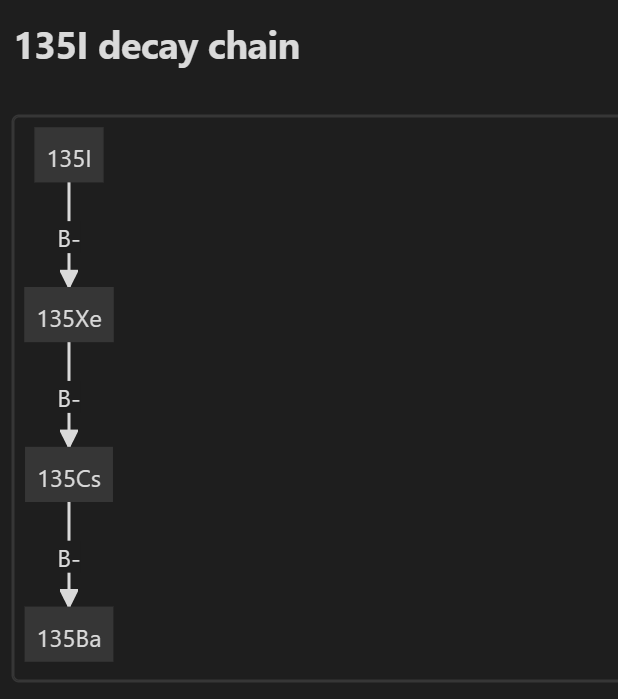

You will also notice the output of `nuclide.display_decay_chain` is a readable list of dataframes

# Decay chain concentration profiles
After creating your decay chain, you can calculate the concentrations over time for each of the linear branches. We do this by initialising the bateman object. After running `nuclide.initialise_bateman_object` we get the following result in `nuclide.decay_chain`

In [8]:
nuclide.initialise_bateman_objects()
print(nuclide.decay_chain)

[                                          nuclide    dm  intensity   
0  <nuclide.Nuclide object at 0x000001EE1E548700>  None        1.0  \
1  <nuclide.Nuclide object at 0x000001EE1E66F520>    B-        1.0   
2  <nuclide.Nuclide object at 0x000001EE1E68D630>    B-        1.0   
3  <nuclide.Nuclide object at 0x000001EE1E68E410>    B-        1.0   

   dintensity path_index                  half_life          half_life_uncert   
0         0.0       None            (23688.0, None)             (108.0, None)  \
1         0.0          0            (32904.0, None)              (72.0, None)   
2         0.0         00  (419428800000000.0, None)  (59918400000000.0, None)   
3         0.0        000               (stbl, None)                  (, None)   

                                    bateman_object  
0  <nuclide._Bateman object at 0x000001EE1E68EAD0>  
1  <nuclide._Bateman object at 0x000001EE1E68EB00>  
2  <nuclide._Bateman object at 0x000001EE1E68EEF0>  
3  <nuclide._Bateman object at

This is a list of the individual decay paths (only 1 here for I135), with pandas dataframes containing all of the information of a decay chain.

The bateman object is a private class `_Bateman`, and contains methods for calculating the concentrations over time, as well as the concentrations' derivative and integral. There is also a method for displaying the latex formula of a given decay chain for readable confirmation of the equations used.

For example

In [9]:
from nuclide import _Bateman

bateman_example = _Bateman(2, [], [], 1)
pprint(bateman_example.bateman_equation_latex(2))

N_{1}(t) &= N_1(0)\times\times\left( e^{-\lambda_{1}t}\right) \\
N_{2}(t) &= N_1(0)\times\lambda_{1}\times\left(\frac{ e^{-\lambda_{1}t}}{(\lambda_{2}-\lambda_{1})}+\frac{ e^{-\lambda_{2}t}}{(\lambda_{1}-\lambda_{2})}\right) \\
None


These can be displayed in latex like so
$$
\begin{aligned}
N_{1}(t) &= N_1(0)\times\times\left( e^{-\lambda_{1}t}\right) \\
N_{2}(t) &= N_1(0)\times\lambda_{1}\times\left(\frac{ e^{-\lambda_{1}t}}{(\lambda_{2}-\lambda_{1})}+\frac{ e^{-\lambda_{2}t}}{(\lambda_{1}-\lambda_{2})}\right) \\
\end{aligned}
$$

We can view the normalised concentations over time for a linear chain by calling the `nuclide.concentration_profile` method

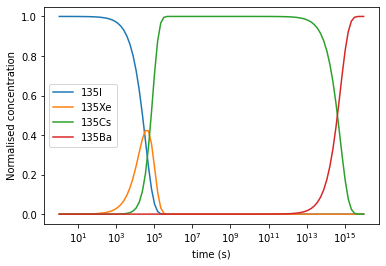

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# defining a time space
t = np.logspace(0, 16, 100)
# calculating the concentration profiles for the first linear chain (I135 only has 1)
concentration_profiles = nuclide.concentration_profile(nuclide.decay_chain[0])

# Go through the linear chains
for i, decay_element in enumerate(concentration_profiles):
    # get the nuclide symbol from nubase
    label = nuclide.decay_chain[0].loc[i, 'nuclide'].nuclide_nubase_info['A El'].values[0]
    # plot
    plt.plot(t, decay_element(t), label=label)
plt.xscale('log')
plt.xlabel('time (s)')
plt.ylabel('Normalised concentration')
plt.legend()
plt.show()

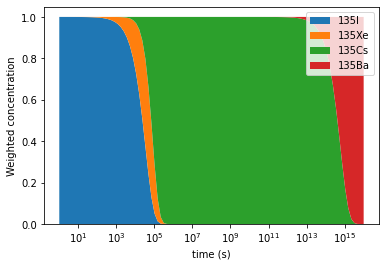

In [11]:
weighted_concentrations = nuclide.nuclide_concentration_profile()

for linear_chain in weighted_concentrations:
    profiles = []
    labels = []
    for i, decay_element in enumerate(linear_chain):
        # get the nuclide symbol from nubase
        label = nuclide.decay_chain[0].loc[i, 'nuclide'].nuclide_nubase_info['A El'].values[0]
        # plot
        profiles.append(decay_element(t))
        labels.append(label)

    plt.stackplot(t, np.array(profiles), labels=labels)
plt.xscale('log')
plt.xlabel('time (s)')
plt.ylabel('Weighted concentration')
plt.legend()
plt.show()

This is no different to the previous plot we made, but if we where to use another element instead of I135, that has a branching decay chain, the total height of the concentrations would be scaled by the branching ratio for that particular decay path. 

# Xe poisoning

Xe135 has a large thermal neutron cross section, which means it will transmutate into Xe136 during reactor operations. This can be modelled using the `xe_poisoning` method. You can adjust the neutron flux, neutron percent and neutron cross section if needed. After running this method, a new column called `xe_poisoning_concentration` is created in the linear chains dataframe in `nuclide.decay_chain`. This can therefore be used to compare the concentrations over time with and without Xe poisoning included. The linear chain also gets a new entry at the end of it's dataframe, that being Xe136

In [20]:
nuclide = Nuclide(91, 42, database_path=cwd+'\\databases\\')
nuclide.make_decay_chain()
nuclide.break_decay_chain_branches()
nuclide.initialise_bateman_objects()
nuclide.xe_poisoning(t)

In [21]:
nuclide.decay_chain[1]

,nuclide,dm,intensity,dintensity,path_index,half_life,half_life_uncert,bateman_object,AZI,xe_poisoning_concentration
0,<nuclide.Nuclide object at 0x000001EE22C8A260>,None,1.0,0.0,None,"(929.4, None)","(0.6, None)",<nuclide._Bateman object at 0x000001EE26A1CC40>,0910420,"[0.9992544773294868, 0.9989185560482816, 0.998..."
1,<nuclide.Nuclide object at 0x000001EE2778A950>,B+,1.0,0.0,0,"(21444480000.0, None)","(4099680000.0, None)",<nuclide._Bateman object at 0x000001EE26A1CCA0>,0910410,"[0.0007455226705009873, 0.0010814439516931267,..."
2,<nuclide.Nuclide object at 0x000001EE2778BB20>,EC,1.0,0.0,00,"(stbl, None)","(, None)",<nuclide._Bateman object at 0x000001EE26A1DD20>,0910400,"[1.2053210427757724e-14, 2.542474074605145e-14..."


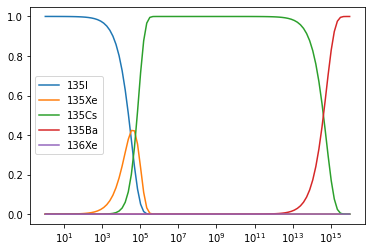

In [14]:
for i, row in nuclide.decay_chain[0].iterrows():
    concentration = row.xe_poisoning_concentration
    label = row.nuclide.nuclide_nubase_info.loc[row.AZI, 'A El']
    plt.plot(t, concentration, label=label)

plt.xscale('log')
plt.legend()

It may look as though Xe136 didn't make any contributions, but if we have a look at the max value of Xe136, and Cs135, we will notice that Xe136 did indeed increase in concentration, while Cs135 never reaches 1 (as it would without this)

In [15]:
print("Max Xe136 concentration", max(nuclide.decay_chain[0].loc[4, 'xe_poisoning_concentration']))
print("Max Cs135 concentration", max(nuclide.decay_chain[0].loc[2, 'xe_poisoning_concentration']))

Max Xe136 concentration 0.00021299571114270853
Max Cs135 concentration 0.9997577374928316
